# **Paul Golder - Capstone Project March 2025**

## Objectives

* Enhance data for use in Machine Learning Models

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

In [46]:
import os
current_dir = os.getcwd()
current_dir

'h:\\VScode\\CapStoneProject_2025'

In [5]:
# check current directory contains the file README.md
if os.path.exists("README.md"):
    print("The file README.md exists in the current directory")
else:
    print("The file README.md does not exist in the current directory")
    print("You are in the directory: ", current_dir)
    print("Changing current directory to its parent directory")
    os.chdir(os.path.dirname(current_dir))
    print("You set a new current directory")
    current_dir = os.getcwd()
    if os.path.exists("README.md"):
        print("The file README.md exists in the current directory")
    else:
        RuntimeError("The file README.md does not exist in the current directory, please check the current directory")
        print("Current Directory =", current_dir)

The file README.md does not exist in the current directory
You are in the directory:  h:\VScode\CapStoneProject_2025\transform
Changing current directory to its parent directory
You set a new current directory
The file README.md exists in the current directory


# Section 1

Section 1 content

In [ ]:
%pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy.sparse import issparse
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split


# Get transformed feature names
from itertools import chain

## Data Preperation First run 

Code to perform initial level data pre-processing, transformation and analysis for machine learning.

Requested advice from Gemini 2.0 on how to handle the date function

This was its guidance

Handling date fields in machine learning preprocessing is crucial because dates contain valuable temporal information that can significantly impact model performance. Here's a recommended approach, broken down into key steps and considerations:   

1. Understand the Date Field:

Format: Determine the format of your date field (e.g., YYYY-MM-DD, MM/DD/YYYY, Unix timestamp). Ensure consistency.
Time Zone: If applicable, handle time zones appropriately. Consider converting all dates to a consistent time zone (e.g., UTC).
Granularity: Assess the level of detail in the date (e.g., year, month, day, hour, minute, second). Decide which level of granularity is relevant to your model.

2. Data Cleaning and Conversion:

Missing Values: Handle missing dates appropriately. Options include:
Imputation: Fill missing dates with mean, median, or mode (if appropriate).
Creating a "missing" category.   
Removing rows with missing dates (if feasible).
  
Data Type Conversion: Convert the date field to a datetime object in your programming environment (e.g., datetime in Python's pandas). This enables easy extraction of date components.
Error Handling: Address any invalid or inconsistent date formats.

3. Feature Extraction:

This is the most important step. Extract meaningful features from the date field that your model can use. Common techniques include:

Temporal Components: Extract individual components of the date:
Year
Month
Day
Day of week (e.g., Monday, Tuesday)
Week of year
Time Differences: Calculate time differences between dates:
Time elapsed since a specific event.   
Time between consecutive events.
Days since a holiday.

Cyclical Features: For cyclical features like month or day of week, use sine and cosine transformations to preserve their cyclical nature:
sin(2 * pi * month / 12)
cos(2 * pi * month / 12)
This prevents the model from treating January and December as distant points.

4. Feature Selection/Engineering:

After extracting numerous features, use feature selection techniques to identify the most relevant ones.
Consider domain knowledge to create meaningful features.   
Python Example (using pandas):


# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

# Cyclical features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

#Example of time difference.
df['Days_since_start'] = (df['date'] - pd.to_datetime('2023-10-20')).dt.days

print(df)
Key Considerations:

Domain Knowledge: The most effective feature engineering often comes from understanding the underlying domain.
Model Type: The best approach may vary depending on the type of model you're using. For example, tree-based models can handle categorical features well, while linear models may require more numerical transformations.   
Overfitting: Be cautious of creating too many features, which can lead to overfitting.
Data Leakage: Ensure that you are not using future information to predict past events. This is especially important when dealing with time series data.
Seasonality: If your data exhibits seasonality, make sure to capture it appropriately.
By following these guidelines, you can effectively transform and preprocess date fields for your machine learning models, leading to improved performance.

Steps to be taken
- Extract Features from Date - Year, Month, Day, Day of Week, create month_sin and month_cos
- Divide features into numeric, high cardinality and low cardinality features
- Numeric features will then have the Scikit Learn StandardScaler applied, this takes the values difference from the mean and divides it by the standard deviation to produce a Variance centred around 1, enabling easier cross feature relationship comparison by minimising scalar impacts.
- Features with high numbers of unique categorys will be classified and High Cardinality and these will be classified using the OrdinalEncoder Skikit Learn feature. this transforms text classifications into numeric classifications, which supports better machine learning models.
- Features with low numbers of unique categories will be classified as low_cardinality_features and OneHotEncoder will be used to create unique boolean columns for each value.  These will then be used as unique features.
- Following these transformations - a feature correlation will be performed and BoxPlots will be created for each feature to visualise the distribution of values.
- 

Observations and Model variants

The first few version of the model delivered 100% forecasts, this suggested that there was significant difference between the Real and Fake news.

Several iterations were then undertaken during which it was identified that the following features contained biaise 
 - Subject
 - Source
 - Location
 - Source Name


In [ ]:
# Load dataset
source_df = pd.read_csv("data/combined_data.csv")

# Define features
numericfeatures = [
                   "month",
                   "day",
                   "year",
                   "week_of_year",
                   "is_weekend",
                   "is_weekday",
                   "week_of_year_sin",
                   "week_of_year_cos",
                   "holiday",
                   "day_of_month_sine",
                   "day_of_month_cos",
                   "month_sin",
                   "month_cos",   
                   ]
skewed_numeric_features = ["title_length", "text_length"]
high_cardinality_features = ["location"]
low_cardinality_features = ["media_type",
                            # "source_name",
                            # "subject",
                            "day_label",
                            "day_of_week"
                            ]
features =  low_cardinality_features + skewed_numeric_features + numericfeatures
target = "label"
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('numskew', PowerTransformer(method='yeo-johnson', standardize=True), skewed_numeric_features),
        ('num', StandardScaler(), numericfeatures),
        # ('ord', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), high_cardinality_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), low_cardinality_features)
    ]
)

# Create pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# Fit and transform data
transformed_data = pipeline.fit_transform(source_df)

# Convert sparse matrix to DataFrame if necessary
if issparse(transformed_data):
    transformed_data = transformed_data.toarray()

processed_df = pd.DataFrame(transformed_data)

# Numeric features remain the same
numeric_feature_names = numericfeatures  

# Ordinal encoded features remain but are numerical
ordinal_feature_names = high_cardinality_features  

# Get the names for OneHotEncoded features
onehot_feature_names = list(pipeline.named_steps['preprocessor']
                            .named_transformers_['cat']
                            .get_feature_names_out(low_cardinality_features))

# Combine them all
all_feature_names =  list(onehot_feature_names) + list(skewed_numeric_features)  # +numeric_feature_names + ordinal_feature_names
# Assign them to the transformed DataFrame
processed_df.columns = all_feature_names

# Merge back the target column
processed_df["label"] = source_df["label"]  # Ensure correct alignment!

# Check correlation - the closer to 1 or -1, the stronger the correlation
correlation = processed_df.corr()["label"].sort_values(ascending=False)
correlation

label                 1.000000
media_type_video      0.566222
media_type_twitter    0.135191
title_length          0.028589
media_type_poll      -0.018864
media_type_text      -0.286929
text_length          -0.484572
media_type_image     -0.594333
Name: label, dtype: float64

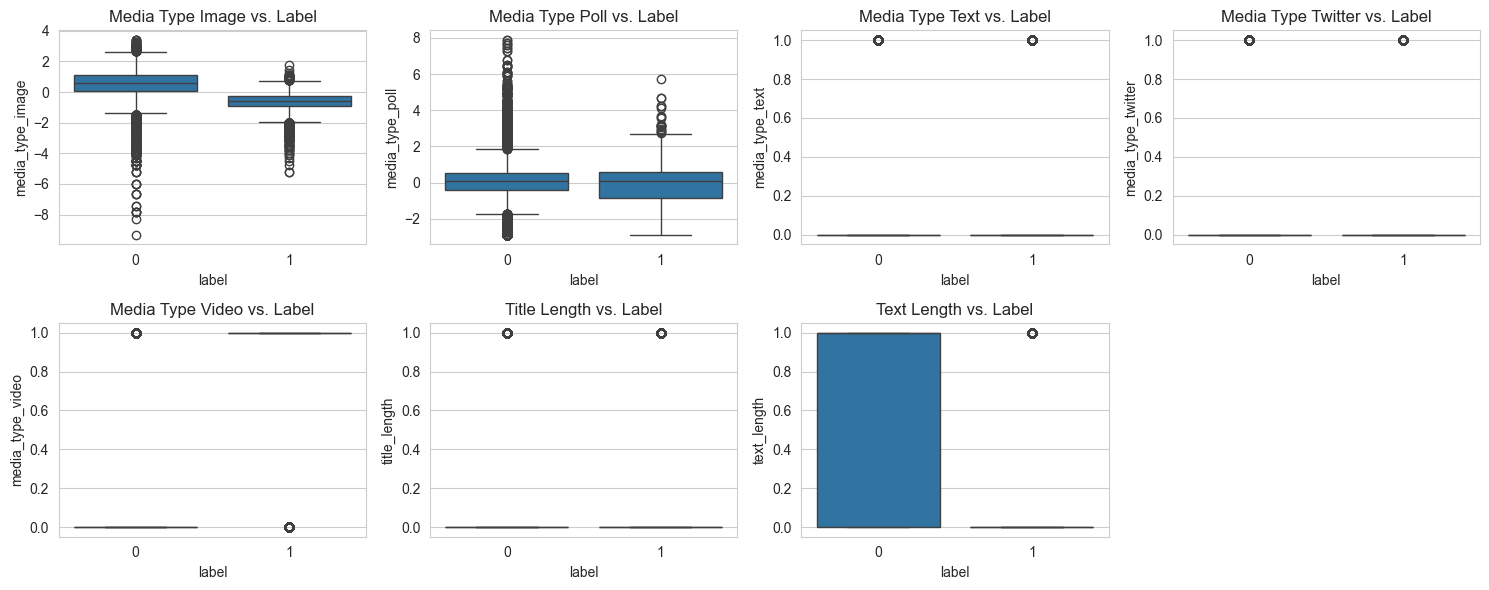

In [115]:
# Define the features to plot
all_feature_names = [col for col in processed_df.columns if col != target]
features_to_plot = all_feature_names

# Calculate the number of rows needed
num_features = len(features_to_plot)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=processed_df["label"], y=processed_df[feature], ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs. Label")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [116]:
# Train a simple model
X = processed_df.drop(columns=["label"])
y = processed_df["label"]
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

media_type_image      0.402036
media_type_poll       0.282837
media_type_video      0.125065
text_length           0.110621
media_type_text       0.055435
media_type_twitter    0.016515
title_length          0.007491
dtype: float64


In [117]:
# remove low-variance features
# Remove features with very low variance (e.g., all values are almost the same)
var_thresh = VarianceThreshold(threshold=0.01)  # Remove near-constant features
X_reduced = var_thresh.fit_transform(X)

# Get the remaining feature names
selected_features = X.columns[var_thresh.get_support()]
print("Remaining Features:", list(selected_features))

Remaining Features: ['media_type_image', 'media_type_poll', 'media_type_text', 'media_type_twitter', 'media_type_video', 'title_length', 'text_length']


In [118]:
# Compute correlation matrix
corr_matrix = X[selected_features].corr().abs()

# Find features with correlation above 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_reduced = X[selected_features].drop(columns=to_drop)

print("Features after correlation filtering:", list(X_reduced.columns))

Features after correlation filtering: ['media_type_image', 'media_type_poll', 'media_type_text', 'media_type_twitter', 'media_type_video', 'title_length', 'text_length']


In [119]:
# implement Recursive Feature Elimination (RFE) - to train the model and remove least important features
# Use RandomForest to evaluate feature importance
rfe_selector = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X_reduced, y)

# Get selected feature names
selected_features = X_reduced.columns[rfe_selector.support_]
print("Final Selected Features:", list(selected_features))

Final Selected Features: ['media_type_image', 'media_type_poll', 'media_type_text', 'media_type_twitter', 'media_type_video', 'title_length', 'text_length']


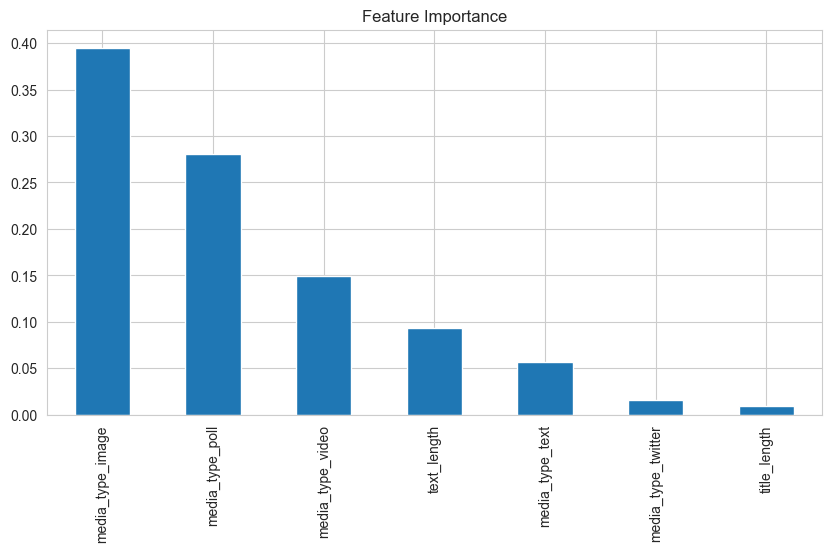

In [120]:
# Train a final model with selected features
model = RandomForestClassifier()
model.fit(X_reduced[selected_features], y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)
importances.plot(kind="bar", figsize=(10, 5), title="Feature Importance")
plt.show()


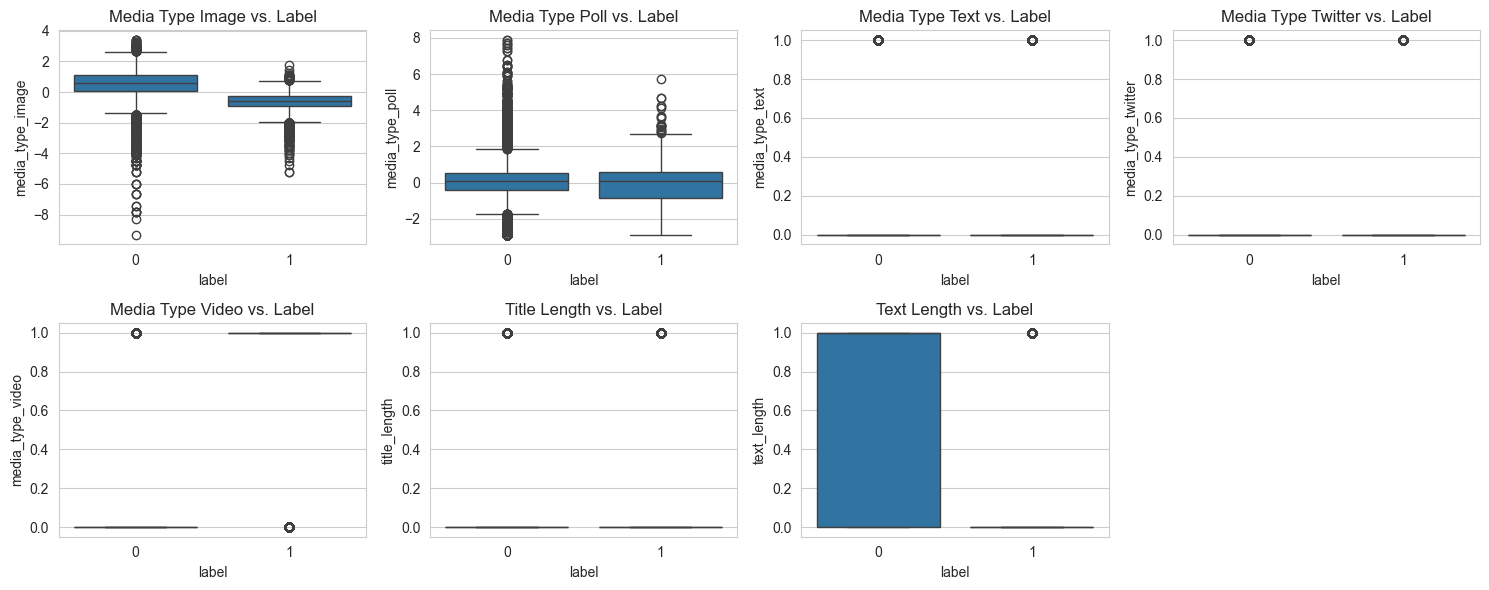

In [121]:
# Define the features to plot
features_to_plot = selected_features

# Calculate the number of rows needed
num_features = len(features_to_plot)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x=processed_df["label"], y=processed_df[feature], ax=axes[i])
    axes[i].set_title(f"{feature.replace('_', ' ').title()} vs. Label")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [122]:
print(processed_df.head())
print(selected_features)

   media_type_image  media_type_poll  media_type_text  media_type_twitter  \
0         -0.599242         1.166046              0.0                 0.0   
1         -0.599242         0.949471              0.0                 0.0   
2         -0.860621         0.391909              0.0                 0.0   
3         -0.930225         0.225629              0.0                 0.0   
4         -0.306088         1.351752              0.0                 0.0   

   media_type_video  title_length  text_length  label  
0               0.0           1.0          0.0      1  
1               0.0           1.0          0.0      1  
2               1.0           0.0          0.0      1  
3               1.0           0.0          0.0      1  
4               0.0           1.0          0.0      1  
Index(['media_type_image', 'media_type_poll', 'media_type_text',
       'media_type_twitter', 'media_type_video', 'title_length',
       'text_length'],
      dtype='object')


In [123]:
pipeline2 = Pipeline([
      ("feature_scaling", StandardScaler()) 
  ])
# use pipeline to encode the categorical features
X2 = processed_df[selected_features]
y2 = processed_df[target]
X2 = pd.DataFrame(X2, columns=selected_features)
X2.head()


,media_type_image,media_type_poll,media_type_text,media_type_twitter,media_type_video,title_length,text_length
0,-0.599242,1.166046,0.0,0.0,0.0,1.0,0.0
1,-0.599242,0.949471,0.0,0.0,0.0,1.0,0.0
2,-0.860621,0.391909,0.0,0.0,1.0,0.0,0.0
3,-0.930225,0.225629,0.0,0.0,1.0,0.0,0.0
4,-0.306088,1.351752,0.0,0.0,0.0,1.0,0.0


In [124]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(processed_df[selected_features], processed_df[target], test_size=0.2, random_state=42)
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(35882, 7) (35882,) (8971, 7) (8971,)


In [125]:
pipeline2.fit(X_train2)
X_train_scaled = pipeline2.transform(X_train2)
X_test_scaled = pipeline2.transform(X_test2)

In [126]:
type(X_train_scaled)
X_train_scaled = pd.DataFrame(data= X_train_scaled, columns=X_train2.columns)
X_test_scaled = pd.DataFrame(data= X_test_scaled, columns=X_train2.columns)

---

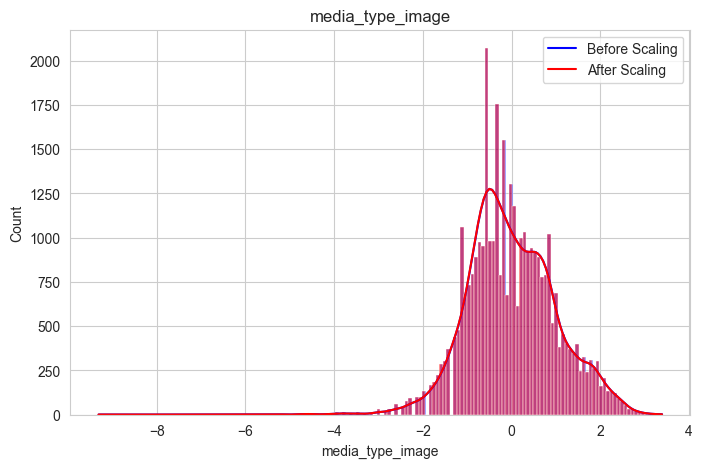

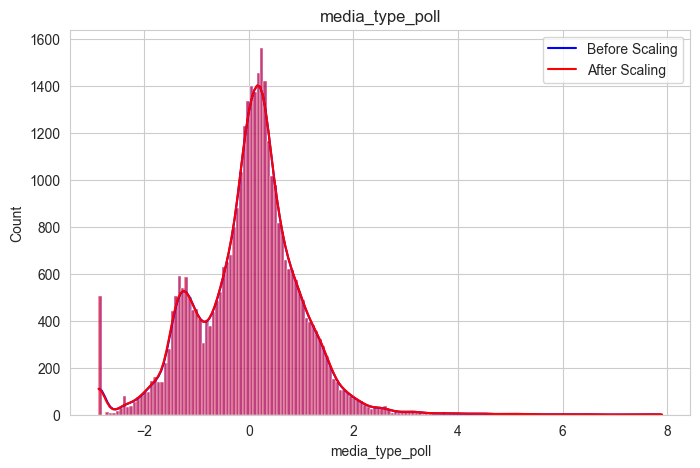

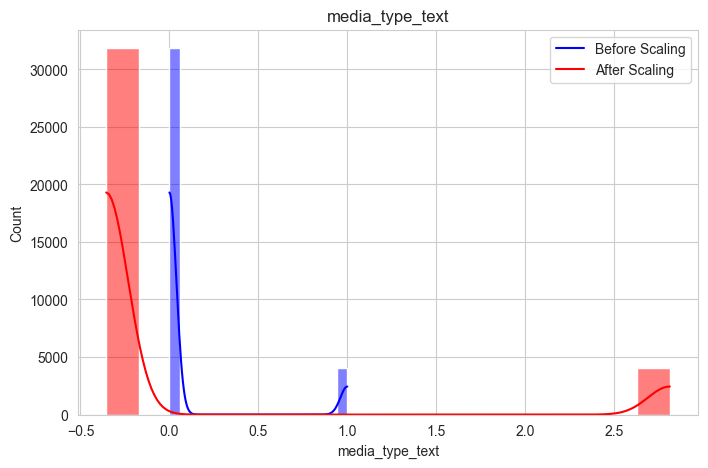

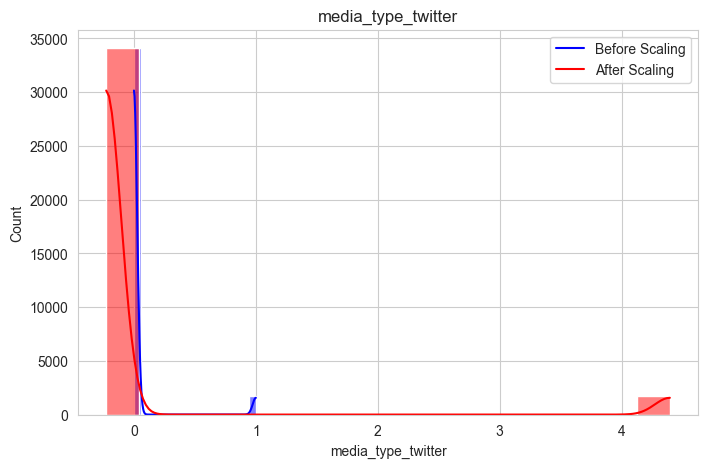

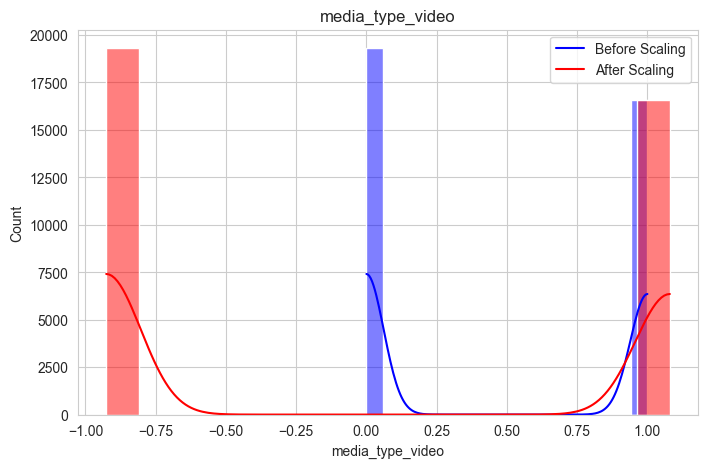

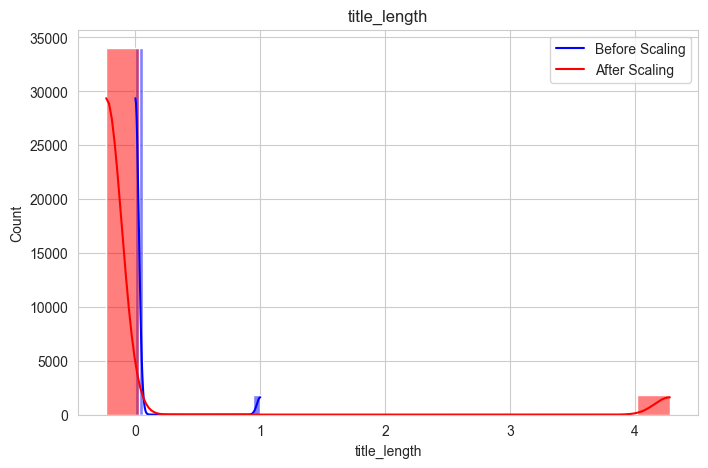

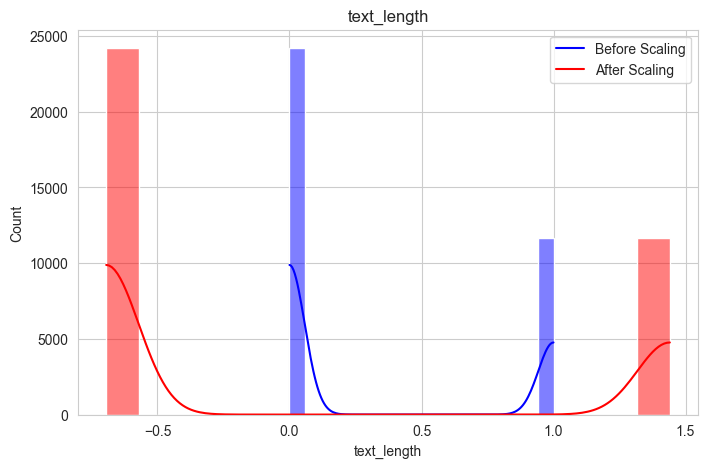

In [127]:
sns.set_style('whitegrid')
for col in X_train2.columns:
  fig, axes = plt.subplots(figsize=(8,5))
  sns.histplot(data=X_train2, x=col, kde=True, color='b',  ax=axes)
  sns.histplot(data=X_train_scaled, x=col, kde=True,color='r', ax=axes)
  axes.set_title(f"{col}")
  axes.legend(labels=['Before Scaling', 'After Scaling'])
  plt.show()
  print("\n\n")

In [128]:
X_train, X_test, y_train, y_test = train_test_split(processed_df.drop([target],axis=1),
                                                    processed_df[target],
                                                    test_size=0.2,
                                                    random_state=80)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (35882, 7) (35882,) 
* Test set: (8971, 7) (8971,)


In [129]:
# lets try a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier(random_state=56)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [130]:
def confusion_matrix_and_report(X,y,pipeline,label_map):
  """
  Gets features, target, pipeline and how labelled (named) the levels from your target

  - it predicts based on features
  - compare predictions and actuals in a confusion matrix
    - the first argument stays as rows and the second stay as columns in the matrix
    - we will use the pattern where the predictions are in the row and actual values are in the columns
    - to refresh that, revert to the Performance Metric video in Module 2
  - show classification report

  """

  prediction = pipeline.predict(X)

  print('---  Confusion Matrix  ---')
  print(pd.DataFrame(confusion_matrix(y_true=prediction, y_pred=y),
        columns=[ ["Actual " + sub for sub in label_map] ], 
        index= [ ["Prediction " + sub for sub in label_map ]]
        ))
  print("\n")


  print('---  Classification Report  ---')
  print(classification_report(y, prediction, target_names=label_map),"\n")

In [66]:
def clf_performance(X_train,y_train,X_test,y_test,pipeline,label_map):
  """
  gets the features and target from train and test set, pipeline how
  you labelled (named) the levels from your target
  - for each set (train and test), it calls the function above to show the confusion matrix
  and classification report for both train and test set
  """

  print("#### Train Set #### \n")
  confusion_matrix_and_report(X_train,y_train,pipeline,label_map)

  print("#### Test Set ####\n")
  confusion_matrix_and_report(X_test,y_test,pipeline,label_map)

In [68]:
def feature_importance_tree_based_models(model, columns):
  """
  Gets the model and the columns used to train the model
  - We use the model.feature_importances_ and columns to make a
  DataFrame that shows the importance of each feature
  - Next, we print the feature name and its relative importance order,
  followed by a barplot indicating the importance

  """

  # create DataFrame to display feature importance
  df_feature_importance = (pd.DataFrame(data={
      'Features': columns,
      'Importance': model.feature_importances_})
  .sort_values(by='Importance', ascending=False)
  )

  best_features = df_feature_importance['Features'].to_list()

  # Most important features statement and plot
  print(f"* These are the {len(best_features)} most important features in descending order. "
        f"The model was trained on them: \n{df_feature_importance['Features'].to_list()}")

  df_feature_importance.plot(kind='bar',x='Features',y='Importance')
  plt.show()

In [131]:
X_live = X_test.iloc[0:50]
y_live = y_test.iloc[0:50]
y_pred_live = model.predict(X_live)
y_pred_prob_live = model.predict_proba(X_live)

clf_performance(X_train=X_train,
               X_test=X_test,
               y_train=y_train,
               y_test=y_test,
               pipeline=model,
               label_map=["Fake", "Real"]
                     )

#### Train Set #### 

---  Confusion Matrix  ---
                Actual Fake Actual Real
Prediction Fake       18721          75
Prediction Real           3       17083


---  Classification Report  ---
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     18724
        Real       1.00      1.00      1.00     17158

    accuracy                           1.00     35882
   macro avg       1.00      1.00      1.00     35882
weighted avg       1.00      1.00      1.00     35882
 

#### Test Set ####

---  Confusion Matrix  ---
                Actual Fake Actual Real
Prediction Fake        4370         507
Prediction Real         342        3752


---  Classification Report  ---
              precision    recall  f1-score   support

        Fake       0.90      0.93      0.91      4712
        Real       0.92      0.88      0.90      4259

    accuracy                           0.91      8971
   macro avg       0.91      0.90      0.90      